<a href="https://colab.research.google.com/github/FadhlurRahman11/clasification-sentimen-analysis/blob/main/program_skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import Library

In [ ]:
#!pip install pyLDAvis
!pip install scikit-learn
#!pip install --upgrade pyLDAvis
!pip install --upgrade scikit-learn
!pip install matplotlib seaborn wordcloud
#!pip install bertopic
!pip install scikit-learn matplotlib seaborn wordcloud
!pip install --upgrade scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#from pprint import pprint

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

# import dataset

In [ ]:
# Load data (gantilah 'nama_file.csv' dengan nama file dataset Anda)
df = pd.read_csv('./Comments_Facebook.csv')

# Tampilkan beberapa baris pertama data
df.head(10)

,Id,UserId,Avatar,Author,Content,Url,ReactionsCount,Depth,SubCommentsCount,CommentAt
0,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfMTAxMzk3NDA1Mz...,100023422623976,https://scontent-cgk1-2.xx.fbcdn.net/v/t39.308...,Ismi Delfi,#freepalestina,https://www.facebook.com/hasanjunior11/videos/...,0,0,0,07/19/2024 10:27:54 PM
1,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfNDE2NDE4MTI0Nz...,100047449115778,https://scontent-cgk2-2.xx.fbcdn.net/v/t39.308...,Aidahubaedah Ratu Pantura,YaAllah berikan kesehatan keselamatan dan kecu...,https://www.facebook.com/hasanjunior11/videos/...,0,0,0,07/19/2024 10:59:29 PM
2,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfNDYyOTg5OTc2Nj...,100051877994834,https://scontent-cgk1-2.xx.fbcdn.net/v/t39.308...,Marta Dinata,YA ALLAH ENGKAU MAHA PEMBERI BALASAN YANG TERBAIK,https://www.facebook.com/hasanjunior11/videos/...,13,0,0,07/20/2024 07:19:19 AM
3,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfMTk2NjM0NDAwNz...,100016307613318,https://scontent-cgk2-2.xx.fbcdn.net/v/t39.308...,Salmah,ya allah 🤲😭🤲😭🤲😭🤲😭🤲😭🤲😭🇵🇸🇵🇸🇵🇸🇵🇸,https://www.facebook.com/hasanjunior11/videos/...,1,0,0,07/20/2024 12:45:28 PM
4,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfODMyODQxMzI1MT...,100046200762563,https://scontent-cgk2-1.xx.fbcdn.net/v/t1.3049...,Cepi W,https://scontent-cgk2-1.xx.fbcdn.net/v/t39.199...,https://www.facebook.com/hasanjunior11/videos/...,0,0,0,07/20/2024 03:19:38 PM
5,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfODUxOTU2ODE2Mz...,100081912177727,https://scontent-cgk1-2.xx.fbcdn.net/v/t39.308...,Irul Gemoy,Semoga selalu dalam lindungan ALLOH TA ALA... ...,https://www.facebook.com/hasanjunior11/videos/...,3,0,0,07/20/2024 04:05:04 PM
6,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfMTY5Mzk4ODg1MT...,100002934282150,https://scontent-cgk2-2.xx.fbcdn.net/v/t39.308...,Alan Syah Kusuma,Hati2 penipuan.lagi cari2 donasi si hasan ini....,https://www.facebook.com/hasanjunior11/videos/...,14,0,11,07/20/2024 06:45:01 PM
7,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfNzU3MTExNjY2Mz...,100004841705321,https://scontent-cgk2-2.xx.fbcdn.net/v/t39.308...,Arp Noviana Fitisha,😭😭😭,https://www.facebook.com/hasanjunior11/videos/...,1,0,0,07/20/2024 07:49:00 PM
8,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfMjE1MzMwNTE3NT...,100005692365250,https://scontent-cgk2-2.xx.fbcdn.net/v/t39.308...,Luncanak,Ya Allah beri kekuatan saudaraku digaza.AMIN,https://www.facebook.com/hasanjunior11/videos/...,27,0,4,07/20/2024 08:19:01 PM
9,Y29tbWVudDo1MDE1MjgzMDU2NDU3MDBfOTY3MDIwMjA4NT...,100028469311270,https://scontent-cgk1-2.xx.fbcdn.net/v/t1.6435...,Ina Gili Guest House,Saya pigin donasi sama saudara kita di gasa ta...,https://www.facebook.com/hasanjunior11/videos/...,0,0,0,07/20/2024 08:36:23 PM


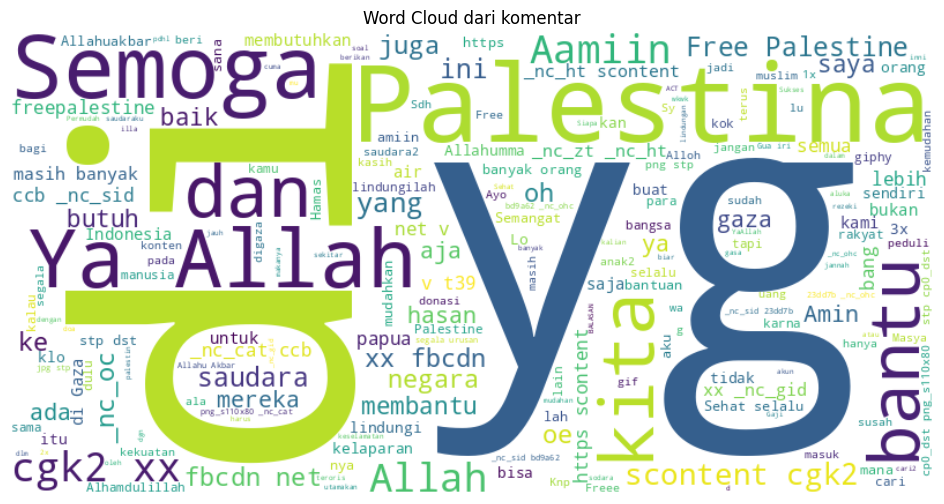

In [ ]:
komentar = ' '.join(df['Content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(komentar)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari komentar')
plt.show()

#Exploratory Data Analysis - Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                200 non-null    object
 1   UserId            200 non-null    int64 
 2   Avatar            200 non-null    object
 3   Author            200 non-null    object
 4   Content           200 non-null    object
 5   Url               200 non-null    object
 6   ReactionsCount    200 non-null    int64 
 7   Depth             200 non-null    int64 
 8   SubCommentsCount  200 non-null    int64 
 9   CommentAt         200 non-null    object
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,UserId,ReactionsCount,Depth,SubCommentsCount
count,2.000000e+02,200.000000,200.0,200.000000
mean,9.103427e+13,2.490000,0.0,1.830000
std,2.267822e+13,8.644858,0.0,13.457586
min,6.569437e+08,0.000000,0.0,0.000000
25%,1.000016e+14,0.000000,0.0,0.000000
50%,1.000201e+14,0.000000,0.0,0.000000
75%,1.000637e+14,1.000000,0.0,0.000000
max,1.000941e+14,77.000000,0.0,133.000000


In [ ]:
df.dtypes

,0
Id,object
UserId,int64
Avatar,object
Author,object
Content,object
Url,object
ReactionsCount,int64
Depth,int64
SubCommentsCount,int64
CommentAt,object


In [ ]:
df.isnull().sum()

,0
Id,0
UserId,0
Avatar,0
Author,0
Content,0
Url,0
ReactionsCount,0
Depth,0
SubCommentsCount,0
CommentAt,0
